In [56]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Feature 1개

## 단순

In [57]:
hours = np.array([0.3, 0.5, 0.7, 0.7, 1, 1.2, 1.2, 1.3, 1.3, 1.4, 1.8, 2.4, 2.6, 3.2, 3.3, 3.5, 3.6, 3.9, 4.1, 4.4, 4.5, 5,5,  5.3, 5.5, 5.8, 5.7, 5.9, 5.9, 6,  6, 6.1, 6.2, 6.9, 7.1, 7.2, 7.4, 7.5, 7.8, 7.9, 8, 8, 8.4, 8.6, 9.2, 9.3, 9.5, 10, 10.5,  12 ])
score = np.array([5, 10, 8, 12, 11, 8, 23,17, 19, 10, 25, 26, 22, 30, 35,41, 27, 33, 21, 49, 38, 50, 54, 57, 60, 72, 50, 55, 62, 68, 70, 49, 72, 50, 56, 65, 60, 58, 70, 75, 77, 86, 80, 90, 85, 87, 79, 100, 95,97])

In [58]:
print(hours.shape)
print(score.shape)
print(absent.shape)

(50,)
(50,)
(50,)


In [59]:
X = hours.reshape(-1,1)
y = score.reshape(-1,1)

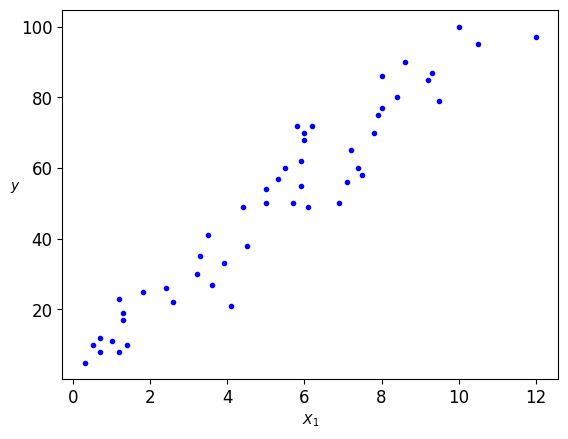

In [60]:
plt.plot(X, y, "b.")
plt.xlabel("$X_1$", fontsize=10)
plt.ylabel('$y$', rotation=0, fontsize=10)
plt.show()

In [61]:
# 정규 방정식
N,D = X.shape
X_b = np.c_[np.ones((N,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [62]:
theta_best

array([[4.55306369],
       [8.71583582]])

In [63]:
X_new = np.array([[0], [12]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[  4.55306369],
       [109.14309357]])

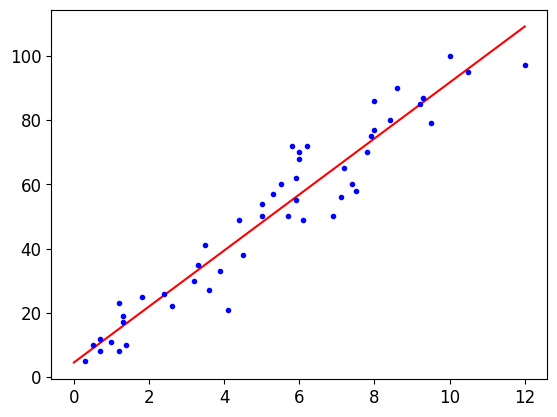

In [64]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55306369]), array([[8.71583582]]))

In [66]:
lin_reg.predict(X_new)

array([[  4.55306369],
       [109.14309357]])

# 경사 하강법
## 배치 경사 하강법

In [67]:
eta = 0.01
n_iterations = 1000
m = 50

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta -= eta*gradients

In [68]:
theta

array([[4.53259428],
       [8.71880579]])

In [69]:
X_new_b.dot(theta)

array([[  4.53259428],
       [109.15826374]])

In [70]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<ipython-input-70-ab263287bbb1>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


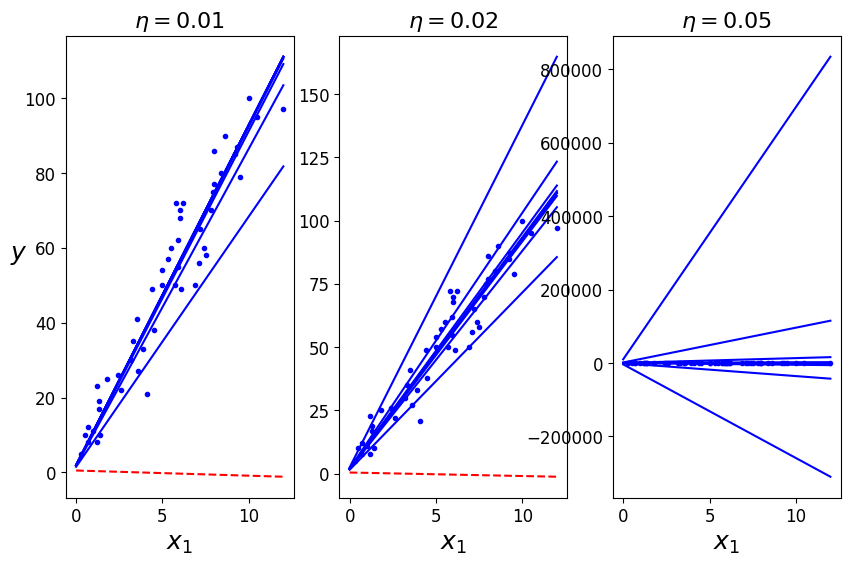

In [71]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,6))
plt.subplot(131); plot_gradient_descent(theta, eta=0.01)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.02, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.05)

plt.show()

## 확률적 경사 하강법

In [72]:
theta_path_sgd = []

m = len(X_b)
np.random.seed(42)

In [73]:
X = hours.reshape(-1,1)
y = score.reshape(-1,1)
N,D = X.shape
X_b = np.c_[np.ones((N, 1)), X]

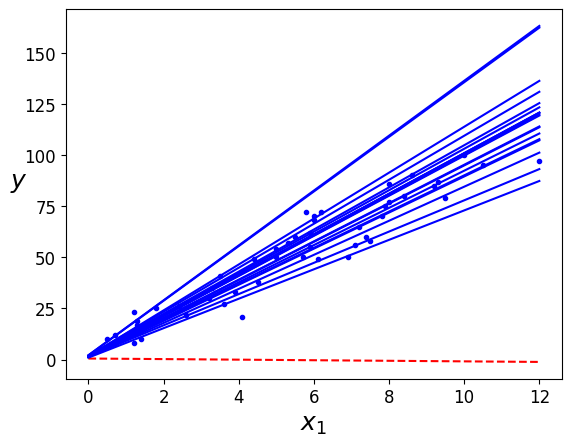

In [74]:
n_epochs = 1000
t0, t1 = 1, 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)                                                                   
plt.show()   

In [75]:
theta

array([[4.37687236],
       [8.79602296]])

In [76]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())


SGDRegressor(penalty=None, random_state=42)

In [77]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.4448501]), array([8.98374541]))

## 미니배치 경사 하강법

In [78]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 10

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 20, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [79]:
theta

array([[4.38417925],
       [8.3194421 ]])

In [80]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

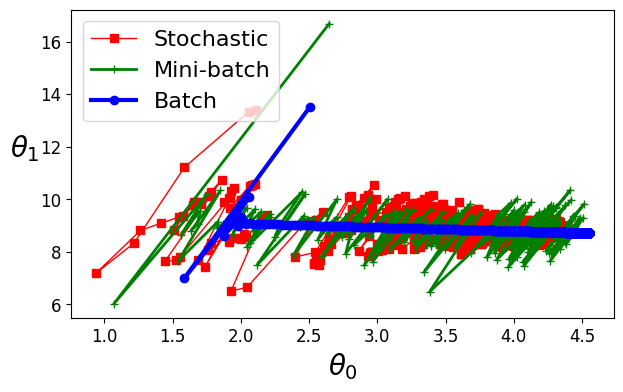

In [81]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
#save_fig("gradient_descent_paths_plot")
plt.show()

# 다항 회귀

In [82]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [83]:
hours = np.array([0.3, 0.5, 0.7, 0.7, 1, 1.2, 1.2, 1.3, 1.3, 1.4, 1.8, 2.4, 2.6, 3.2, 3.3, 3.5, 3.6, 3.9, 4.1, 4.4, 4.5, 5,5,  5.3, 5.5, 5.8, 5.7, 5.9, 5.9, 6,  6, 6.1, 6.2, 6.9, 7.1, 7.2, 7.4, 7.5, 7.8, 7.9, 8, 8, 8.4, 8.6, 9.2, 9.3, 9.5, 10, 10.5,  12 ])
score = np.array([5, 10, 8, 12, 11, 8, 23,17, 19, 10, 25, 26, 22, 30, 35,41, 27, 33, 21, 49, 38, 50, 54, 57, 60, 72, 50, 55, 62, 68, 70, 49, 72, 50, 56, 65, 60, 58, 70, 75, 77, 86, 80, 90, 85, 87, 79, 100, 95,97])

In [84]:
X = hours.reshape(-1,1)
y = score.reshape(-1,1)

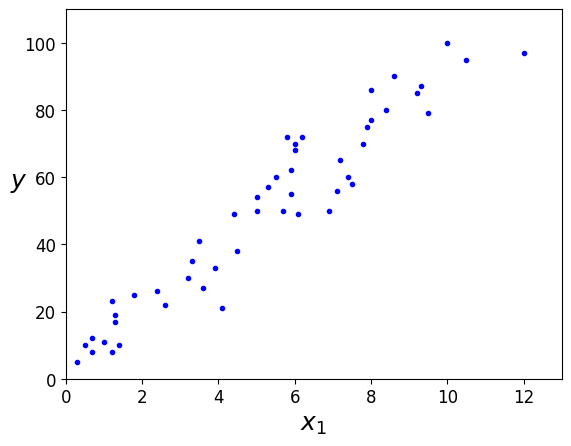

In [85]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 13, 0, 110])
plt.show()

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.3])

In [87]:
X_poly[0]

array([0.3 , 0.09])

In [88]:
poly_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [89]:

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.12136818]), array([[10.06445189, -0.1271178 ]]))

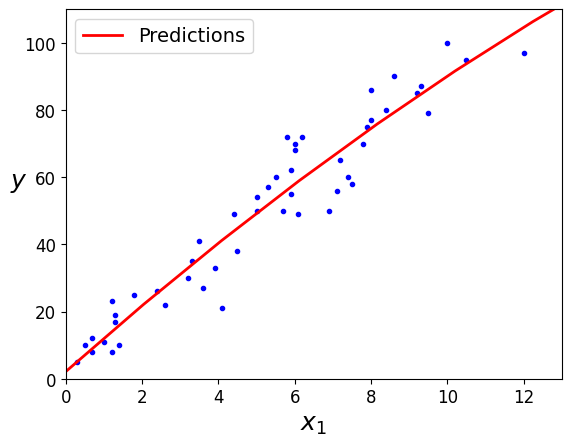

In [90]:
X_new=np.linspace(0, 100).reshape(50, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 13, 0, 110])
plt.show()

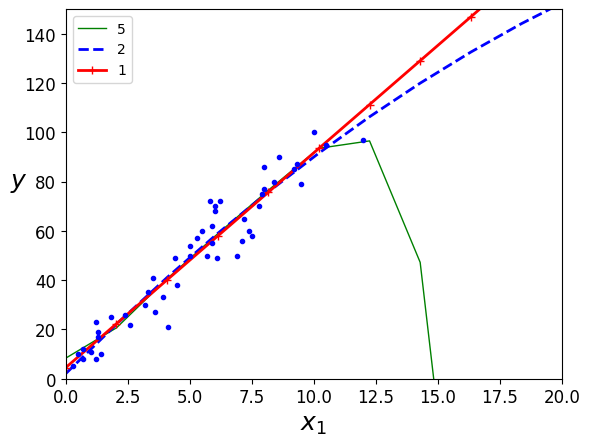

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 5), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    X_poly = polybig_features.fit_transform(X.reshape(-1,1))
    lin_reg.fit(X_poly, y)
    
    X_new_poly = polybig_features.fit_transform(X_new)
    y_newbig = lin_reg.predict(X_new_poly)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 20, 0, 150])

plt.show()

# 학습 곡선


In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

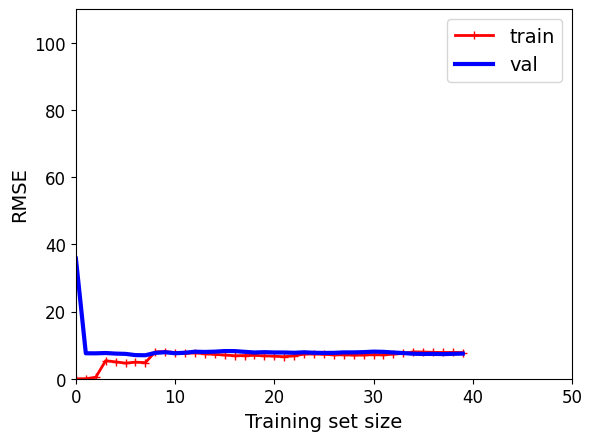

In [93]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 50, 0, 110])
plt.show()                                      

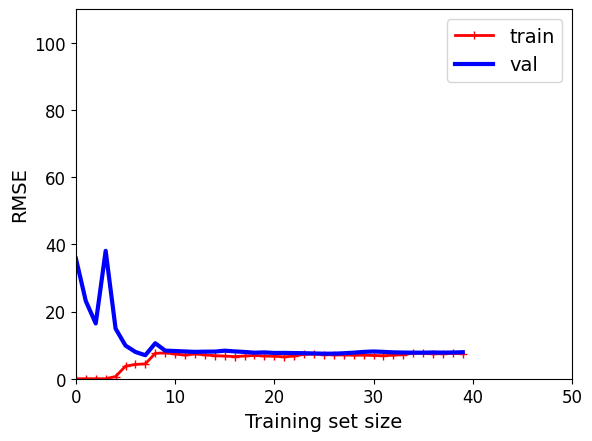

In [94]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,50 ,0, 110])
plt.show()  

# Feature2

**식 4-4: 정규 방정식**

In [95]:
hours = np.array([0.3, 0.5, 0.7, 0.7, 1, 1.2, 1.2, 1.3, 1.3, 1.4, 1.8, 2.4, 2.6, 3.2, 3.3, 3.5, 3.6, 3.9, 4.1, 4.4, 4.5, 5,5,  5.3, 5.5, 5.8, 5.7, 5.9, 5.9, 6,  6, 6.1, 6.2, 6.9, 7.1, 7.2, 7.4, 7.5, 7.8, 7.9, 8, 8, 8.4, 8.6, 9.2, 9.3, 9.5, 10, 10.5,  12 ])
score = np.array([5, 10, 8, 12, 11, 8, 23,17, 19, 10, 25, 26, 22, 30, 35,41, 27, 33, 21, 49, 38, 50, 54, 57, 60, 72, 50, 55, 62, 68, 70, 49, 72, 50, 56, 65, 60, 58, 70, 75, 77, 86, 80, 90, 85, 87, 79, 100, 95,97])
absent = np.array([5, 4, 2, 3, 5, 3, 5, 4, 6, 7, 3, 2, 5, 3, 5, 3,  5, 2, 3, 3, 0, 1, 1, 5, 1, 2, 0, 3, 1, 1, 1, 1, 2, 1, 4, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,0])

In [96]:
x1 = hours.reshape(-1,1)
x2 = absent.reshape(-1,1)
y = score.reshape(-1,1)

In [97]:
X_b = np.c_[np.ones((50,1)), x1, x2]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [98]:
theta_best

array([[ 8.64074183],
       [ 8.30309915],
       [-0.88022482]])

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55306369]), array([[8.71583582]]))

# 경사 하강법
## 배치 경사 하강법

In [100]:
eta = 0.01
n_iterations = 10000
m = 200

theta = np.random.randn(3,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [101]:
theta

array([[ 8.16929114],
       [ 8.35530141],
       [-0.80126853]])

## 확률적 경사 하강법

In [102]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 1000
t0, t1 = 1, 100  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(3,1)

for epoch in range(n_epochs):
    for i in range(m):

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                                          

In [103]:
theta

array([[ 5.03823522],
       [ 8.76446466],
       [-0.30202574]])

In [104]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(penalty=None, random_state=42)

In [105]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.4448501]), array([8.98374541]))

## 미니배치 경사 하강법

In [106]:
theta_path_mgd = []

n_iterations = 500
minibatch_size = 10

np.random.seed(42)
theta = np.random.randn(3,1)

t0, t1 = 1, 100
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [107]:
theta

array([[ 3.60704251],
       [ 8.85987232],
       [-0.03758525]])